In [1]:
import logging
import numpy as np
import pandas as pd
from arch import arch_model
from random import gauss
from random import seed
from matplotlib import pyplot as plt
import scipy.stats as sts

In [2]:
from rules_related import combine_rules_outputs
from whole_algorithm import train_model
from auxiliary import calc_log_returns
from multivariate_normal_distribution import LongMultivariateNormal

# Testing GARCH

## #1 increasing dispersion, increments are normal

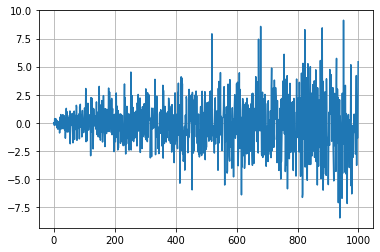

In [3]:
# create dataset
variance = np.arange(0, 10, .01)
# data = [gauss(0, var) for var in variance]
data = [sts.norm(0, var ** .5).rvs(1) for var in variance]

# plot
plt.plot(data)

plt.grid()
plt.show()

In [4]:
n_test = 100

train, test = data[:-n_test], data[-n_test:]

In [5]:
p = 1
q = 1

In [6]:
model = arch_model(train, mean='Zero', vol='GARCH', p=p, q=q, dist='normal')

In [7]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 11484.414076643416
Iteration:      2,   Func. Count:     10,   Neg. LLF: 10229.32771355817
Iteration:      3,   Func. Count:     15,   Neg. LLF: 1823.5795370885426
Iteration:      4,   Func. Count:     19,   Neg. LLF: 11484.223031319243
Iteration:      5,   Func. Count:     24,   Neg. LLF: 11484.439828683573
Iteration:      6,   Func. Count:     29,   Neg. LLF: 1805.873676379431
Iteration:      7,   Func. Count:     33,   Neg. LLF: 1833.601594515003
Iteration:      8,   Func. Count:     40,   Neg. LLF: 1937.8545952308027
Iteration:      9,   Func. Count:     50,   Neg. LLF: 1800.4546633788334
Iteration:     10,   Func. Count:     54,   Neg. LLF: 1801.002570266586
Iteration:     11,   Func. Count:     59,   Neg. LLF: 1797.657072766412
Iteration:     12,   Func. Count:     63,   Neg. LLF: 1796.7941586620773
Iteration:     13,   Func. Count:     67,   Neg. LLF: 1796.73235983176
Iteration:     14,   Func. Count:     72,   Neg. LLF: 1171

In [8]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1796.49
Distribution:                  Normal   AIC:                           3598.97
Method:            Maximum Likelihood   BIC:                           3613.38
                                        No. Observations:                  900
Date:                Sun, Oct 17 2021   Df Residuals:                      900
Time:                        19:18:44   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      8.7

In [9]:
fitted.params

omega       0.008734
alpha[1]    0.000004
beta[1]     0.999995
Name: params, dtype: float64

In [10]:
forecast = fitted.forecast(reindex=False, horizon=n_test)

In [11]:
forecast.residual_variance.values[0]

array([8.03600023, 8.04473121, 8.05346218, 8.06219315, 8.07092412,
       8.07965508, 8.08838604, 8.097117  , 8.10584795, 8.11457889,
       8.12330984, 8.13204078, 8.14077171, 8.14950265, 8.15823358,
       8.1669645 , 8.17569542, 8.18442634, 8.19315726, 8.20188817,
       8.21061907, 8.21934998, 8.22808088, 8.23681177, 8.24554266,
       8.25427355, 8.26300444, 8.27173532, 8.28046619, 8.28919707,
       8.29792794, 8.3066588 , 8.31538967, 8.32412053, 8.33285138,
       8.34158223, 8.35031308, 8.35904392, 8.36777476, 8.3765056 ,
       8.38523643, 8.39396726, 8.40269809, 8.41142891, 8.42015973,
       8.42889054, 8.43762135, 8.44635216, 8.45508296, 8.46381376,
       8.47254456, 8.48127535, 8.49000614, 8.49873693, 8.50746771,
       8.51619848, 8.52492926, 8.53366003, 8.54239079, 8.55112156,
       8.55985232, 8.56858307, 8.57731382, 8.58604457, 8.59477532,
       8.60350606, 8.61223679, 8.62096753, 8.62969825, 8.63842898,
       8.6471597 , 8.65589042, 8.66462114, 8.67335185, 8.68208

In [12]:
forecast.variance.values[0]

array([8.03600023, 8.04473121, 8.05346218, 8.06219315, 8.07092412,
       8.07965508, 8.08838604, 8.097117  , 8.10584795, 8.11457889,
       8.12330984, 8.13204078, 8.14077171, 8.14950265, 8.15823358,
       8.1669645 , 8.17569542, 8.18442634, 8.19315726, 8.20188817,
       8.21061907, 8.21934998, 8.22808088, 8.23681177, 8.24554266,
       8.25427355, 8.26300444, 8.27173532, 8.28046619, 8.28919707,
       8.29792794, 8.3066588 , 8.31538967, 8.32412053, 8.33285138,
       8.34158223, 8.35031308, 8.35904392, 8.36777476, 8.3765056 ,
       8.38523643, 8.39396726, 8.40269809, 8.41142891, 8.42015973,
       8.42889054, 8.43762135, 8.44635216, 8.45508296, 8.46381376,
       8.47254456, 8.48127535, 8.49000614, 8.49873693, 8.50746771,
       8.51619848, 8.52492926, 8.53366003, 8.54239079, 8.55112156,
       8.55985232, 8.56858307, 8.57731382, 8.58604457, 8.59477532,
       8.60350606, 8.61223679, 8.62096753, 8.62969825, 8.63842898,
       8.6471597 , 8.65589042, 8.66462114, 8.67335185, 8.68208

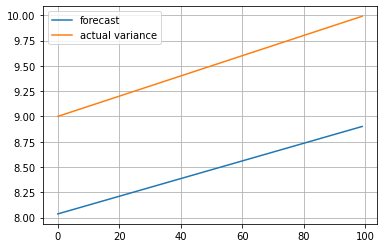

In [13]:
plt.plot(_, label='forecast')
plt.plot(variance[-n_test:], label='actual variance')

plt.legend()
plt.grid()
plt.show()

In [14]:
help(fitted.forecast)

Help on method forecast in module arch.univariate.base:

forecast(params: 'Optional[ArrayLike1D]' = None, horizon: 'int' = 1, start: 'Union[int, DateLike]' = None, align: "Literal['origin', 'target']" = 'origin', method: 'ForecastingMethod' = 'analytic', simulations: 'int' = 1000, rng: 'Optional[Callable[[Union[int, Tuple[int, ...]]], Float64Array]]' = None, random_state: 'Optional[np.random.RandomState]' = None, *, reindex: 'Optional[bool]' = None, x: 'Union[None, Dict[Label, ArrayLike], ArrayLike]' = None) -> 'ARCHModelForecast' method of arch.univariate.base.ARCHModelResult instance
    Construct forecasts from estimated model
    
    Parameters
    ----------
    params : ndarray, optional
        Alternative parameters to use.  If not provided, the parameters
        estimated when fitting the model are used.  Must be identical in
        shape to the parameters computed by fitting the model.
    horizon : int, optional
       Number of steps to forecast
    start : {int, datetim

## #2 white noise (Wiener process) 

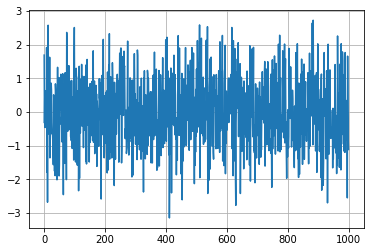

In [15]:
# create dataset
sample_size = 1000
mean = 0
variance = 1
# data = [sts.norm(0, var ** .5).rvs(1) for var in variance]
data = sts.norm(mean, variance ** .5).rvs(sample_size)

# plot
plt.plot(data)

plt.grid()
plt.show()

In [16]:
n_test = int(sample_size / 10)

train, test = data[:-n_test], data[-n_test:]

In [17]:
p = 1
q = 1

In [18]:
model = arch_model(train, mean='Zero', vol='GARCH', p=p, q=q, dist='normal')

In [19]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1309.9884844734543
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1292.4022629646072
Iteration:      3,   Func. Count:     16,   Neg. LLF: 1292.3561269175514
Iteration:      4,   Func. Count:     20,   Neg. LLF: 1292.3537464036986
Iteration:      5,   Func. Count:     24,   Neg. LLF: 1292.3518229045153
Iteration:      6,   Func. Count:     28,   Neg. LLF: 1292.351780987095
Iteration:      7,   Func. Count:     31,   Neg. LLF: 1292.351780987106
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1292.351780987095
            Iterations: 7
            Function evaluations: 31
            Gradient evaluations: 7


In [20]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1292.35
Distribution:                  Normal   AIC:                           2590.70
Method:            Maximum Likelihood   BIC:                           2605.11
                                        No. Observations:                  900
Date:                Sun, Oct 17 2021   Df Residuals:                      900
Time:                        19:18:44   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         

In [21]:
fitted.params

omega       6.253306e-01
alpha[1]    1.190662e-14
beta[1]     3.951988e-01
Name: params, dtype: float64

In [22]:
forecast = fitted.forecast(reindex=False, horizon=n_test)

In [23]:
forecast_variance = forecast.variance.values[0]

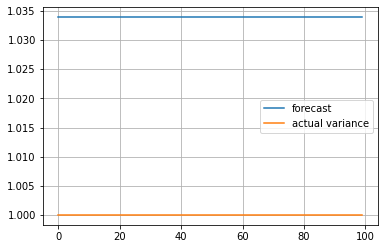

In [24]:
plt.plot(forecast_variance, label='forecast')
plt.plot([variance] * n_test, label='actual variance')

plt.legend()
plt.grid()
plt.show()

# Reading files

In [25]:
rtsi = pd.read_csv('files/RI.RTSI_790101_211016.csv', sep=',')

In [26]:
(rtsi['<TICKER>'] != 'RI.RTSI').any()

False

In [27]:
(rtsi['<TIME>'] != '00:00:00').any()

False

In [28]:
rtsi.drop(columns=['<PER>', '<TIME>', '<TICKER>'], inplace=True)

In [29]:
rtsi['<DATE>'] = pd.to_datetime(rtsi['<DATE>'], format='%Y%m%d')

In [30]:
rtsi.set_index('<DATE>', inplace=True)

In [31]:
rtsi['return'] = rtsi['<CLOSE>'].pct_change(1)

In [32]:
rtsi['log return'] = calc_log_returns(rtsi['<CLOSE>'])  # rtsi['<CLOSE>'].rolling(2).apply(lambda values: np.log(values[1] / values[0])).copy()

In [33]:
rtsi = rtsi.iloc[1:].copy()

In [34]:
rtsi.isna().any()

<OPEN>        False
<HIGH>        False
<LOW>         False
<CLOSE>       False
<VOL>         False
return        False
log return    False
dtype: bool

In [35]:
rtsi

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,return,log return
<DATE>,,,,,,,
2001-02-18,180.10,180.10,180.10,180.10,0,0.000000,0.000000
2001-02-19,180.10,181.21,176.67,177.29,0,-0.015602,-0.015725
2001-02-20,177.29,179.90,175.28,176.45,0,-0.004738,-0.004749
2001-02-21,176.45,176.45,161.12,162.39,0,-0.079683,-0.083037
2001-02-22,162.39,168.35,162.39,168.31,0,0.036455,0.035807
...,...,...,...,...,...,...,...
2021-10-11,1871.73,1883.71,1867.58,1882.43,1769145502,0.011537,0.011471
2021-10-12,1867.15,1876.79,1860.64,1869.94,1386130631,-0.006635,-0.006657
2021-10-13,1869.05,1869.05,1835.80,1855.11,1830447018,-0.007931,-0.007962


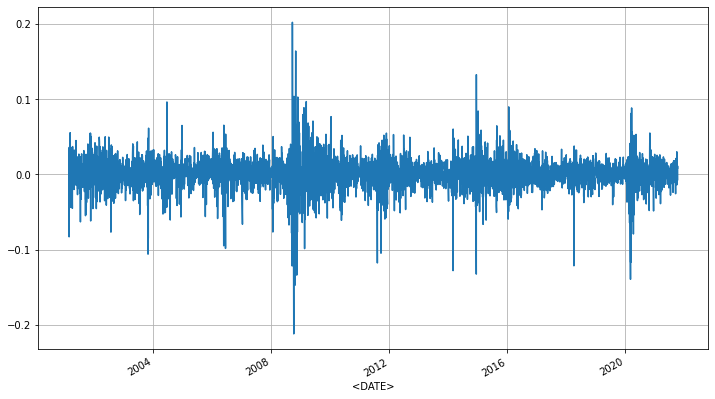

In [36]:
rtsi['log return'].plot(figsize=(12, 7))

plt.grid()
plt.show()

In [37]:
rtsi['log return'].describe()

count    5174.000000
mean        0.000455
std         0.020327
min        -0.211994
25%        -0.008822
50%         0.001318
75%         0.010414
max         0.202039
Name: log return, dtype: float64

# Testing `train`

In [38]:
logging.basicConfig(level=logging.DEBUG)

In [39]:
rescale_factor = 100

In [40]:
input_data = rtsi['log return'].copy() * rescale_factor
clusterization_method = 'gaussian'
local_method = 'garch'
local_method_parameters = {'p': 1, 'q': 1, 'mean': 'Zero', 'dist': 'normal'}

In [41]:
n = input_data.shape[0]

In [42]:
mu = 0
sigma = .02 * rescale_factor

centers = np.array([[mu] * n])
cov_matrices = np.array([np.diag([sigma] * n, k=0)])

In [43]:
slice_len = 350

sts.multivariate_normal(mean=np.longdouble(centers[0][:slice_len]),
                        cov=np.longdouble(cov_matrices[0][:slice_len, :slice_len])).pdf(np.longdouble(input_data[:slice_len])) * \
    ((2 * np.pi) ** (.5 * slice_len))

0.0

In [44]:
np.longdouble(cov_matrices[0][:slice_len, :slice_len])

array([[2., 0., 0., ..., 0., 0., 0.],
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 0., ..., 0., 2., 0.],
       [0., 0., 0., ..., 0., 0., 2.]], dtype=float128)

In [45]:
type(_)

numpy.ndarray

In [46]:
np.longdouble('1e-500')

1e-500

In [47]:
input_data.shape

(5174,)

In [48]:
np.exp(- input_data ** 2 / 2)

<DATE>
2001-02-18    1.000000e+00
2001-02-19    2.904140e-01
2001-02-20    8.933495e-01
2001-02-21    1.065355e-15
2001-02-22    1.644059e-03
                  ...     
2021-10-11    5.179272e-01
2021-10-12    8.012452e-01
2021-10-13    7.283343e-01
2021-10-14    5.351701e-01
2021-10-15    7.100193e-01
Name: log return, Length: 5174, dtype: float64

In [49]:
_.describe()

count    5.174000e+03
mean     5.536186e-01
std      3.610908e-01
min      2.574215e-98
25%      1.918810e-01
50%      6.234863e-01
75%      9.063595e-01
max      1.000000e+00
Name: log return, dtype: float64

In [50]:
0.55 ** input_data.shape[0]

0.0

In [51]:
input_data.shape[0] / 3

1724.6666666666667

In [52]:
np.longdouble('1e300') * 1e10

1e+310

In [53]:
1 / ((2 * np.pi) ** .5)

0.3989422804014327

In [54]:
np.longdouble('1e-1700') * np.longdouble('1e-2500')

1e-4200

In [55]:
train_n = 4000

In [56]:
mv_norm = sts.multivariate_normal(mean=centers[0][:train_n], cov=cov_matrices[0][:train_n, :train_n])

In [57]:
mv_norm.pdf(np.longdouble(input_data)[:train_n])

0.0

In [58]:
logging.basicConfig(level=logging.DEBUG)

In [59]:
lmv_norm = LongMultivariateNormal(mean=centers[0][:train_n], cov=cov_matrices[0][:train_n, :train_n])

In [60]:
lmv_norm.pdf(input_data[:train_n])

DEBUG:pdf:log_pdf = -9659.210944851668, type(log_pdf) = <class 'numpy.float64'>
DEBUG:pdf:long_log_pdf = -9659.210944851668, type(long_log_pdf) = <class 'numpy.float128'>


1.1428444180474473759e-4195

In [61]:
np.longdouble(input_data)

array([ 0.        , -1.57254423, -0.47492598, ..., -0.79623513,
        1.11818655,  0.82760265], dtype=float128)

In [62]:
mv_norm.logpdf(np.longdouble(input_data)[:train_n])

-9659.210944851668

In [63]:
np.exp(np.longdouble(_))

1.1428444180474473759e-4195

In [64]:
type(_)

numpy.float128

In [65]:
clusterization_parameters = {'centers': centers, 'cov_matrices': cov_matrices, 'n_clusters': 1}

In [66]:
train_model(input_data,
            clusterization_method=clusterization_method,
            clusterization_parameters=clusterization_parameters,
            local_method=local_method,
            local_method_parameters=local_method_parameters)

DEBUG:train_model:Starting clusterization
DEBUG:cluster_input:clustering method is gaussian
DEBUG:cluster_input:parameters is not None
INFO:calc_gaussian_membership_degrees:Starting
DEBUG:train_model:Clusterization completed
Estimated parameters: {'centers': array([[0, 0, 0, ..., 0, 0, 0]]), 'cov_matrices': array([[[2., 0., 0., ..., 0., 0., 0.],
        [0., 2., 0., ..., 0., 0., 0.],
        [0., 0., 2., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 2., 0., 0.],
        [0., 0., 0., ..., 0., 2., 0.],
        [0., 0., 0., ..., 0., 0., 2.]]]), 'n_clusters': 1}
Membership degrees:
[0.]
DEBUG:train_model:Starting to run local model for each rule
DEBUG:apply_local_model:Method is GARCH
DEBUG:train_model:Local model runs for each rule are completed. rules_outputs: [[1.90822256]]
DEBUG:train_model:Starting to aggregate all rules outputs to a single one
INFO:combine_rules_outputs:weights_sum: 0.0


Iteration:      1,   Func. Count:      5,   Neg. LLF: 2914271062.0606527
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1206038073.687955
Iteration:      3,   Func. Count:     18,   Neg. LLF: 10121.37091368196
Iteration:      4,   Func. Count:     24,   Neg. LLF: 10109.238422899394
Iteration:      5,   Func. Count:     30,   Neg. LLF: 10103.863020180419
Iteration:      6,   Func. Count:     34,   Neg. LLF: 10103.862970002736
Iteration:      7,   Func. Count:     37,   Neg. LLF: 10103.862970002658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10103.862970002736
            Iterations: 7
            Function evaluations: 37
            Gradient evaluations: 7


/Users/vladimirsviyazov/Documents/Study postgraduate/Thesis/fuzzy-volatility-modeling/rules_related/aggregation.py:14: RuntimeWarning: invalid value encountered in double_scalars
  result = (weights * outputs).sum() / weights_sum


nan

## Same data fed to GARCH(1, 1)

In [67]:
model = arch_model(input_data, mean=local_method_parameters['mean'], vol='GARCH', p=p, q=q,
                   dist=local_method_parameters['dist'])

In [68]:
fitted = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2914271062.0606527
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1206038073.687955
Iteration:      3,   Func. Count:     18,   Neg. LLF: 10121.37091368196
Iteration:      4,   Func. Count:     24,   Neg. LLF: 10109.238422899394
Iteration:      5,   Func. Count:     30,   Neg. LLF: 10103.863020180419
Iteration:      6,   Func. Count:     34,   Neg. LLF: 10103.862970002736
Iteration:      7,   Func. Count:     37,   Neg. LLF: 10103.862970002658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10103.862970002736
            Iterations: 7
            Function evaluations: 37
            Gradient evaluations: 7


In [69]:
fitted.summary

<bound method ARCHModelResult.summary of                        Zero Mean - GARCH Model Results                        
Dep. Variable:             log return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -10103.9
Distribution:                  Normal   AIC:                           20213.7
Method:            Maximum Likelihood   BIC:                           20233.4
                                        No. Observations:                 5174
Date:                Sun, Oct 17 2021   Df Residuals:                     5174
Time:                        19:19:41   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0745  

In [70]:
fitted.params

omega       0.074493
alpha[1]    0.091296
beta[1]     0.889631
Name: params, dtype: float64

In [71]:
forecast = fitted.forecast(reindex=False, horizon=1)

In [72]:
forecast_variance = forecast.variance.values[0]

In [73]:
forecast_variance

array([1.90822256])